<a href="https://colab.research.google.com/github/kpratikin/Topic-Modelling/blob/master/Word_Cloud_and_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Install and Import desired libraries. If any of these are not downloaded please remove comment and download it.

In [0]:
#If not install
#pip install cssselect
import nltk
import pandas as pd
#nltk.download()

In [0]:
import requests
from lxml.html import fromstring

<b>Reading Techcrunch Startup news headlines:
https://techcrunch.com/startups/

In [168]:
#Copy the URL from the web site
url = 'https://techcrunch.com/startups/'
html = requests.get(url, timeout=10).text
#See: http://infohost.nmt.edu/~shipman/soft/pylxml/web/etree-fromstring.html
doc = fromstring(html)

x = doc.cssselect("h2.post-block__title")
headlines = [x[j].text_content().replace('\t','').replace('\n','') for j in range(len(x))]

print(headlines)

['Reefknot Investments launches $50 million fund to invest in logistics and supply chain startups', 'Bellwether Coffee, ‘the fastest-growing company in coffee,’ raises $40M Series B', 'Ashton Kutcher, Ann Miura-Ko and Mamoon Hamid are coming to Disrupt!', 'Why Walmart’s Flipkart is betting heavily on Hindi', '‘Mental fitness’ startup Elevate Labs launches a personalized meditation app called Balance', 'Endurance events startup Let’s Do This raises seed cash from Serena Williams, Usain Bolt', 'We Company adds a director, ditches its $5.9 million naming deal with its CEO, remains a governance nightmare', 'Betaworks’ next startup camp is focused on audio', 'Only 3 days left on early-bird pricing to Disrupt SF 2019', 'Fleet Space Technologies raises $7.35M for its space-based IoT tech', 'Cowboy recruits Sunrise co-founder Jeremy Le Van as VP of Product', 'Ginger, an MIT spin-out providing app-based mental health coaching to workers, raises $35M', 'Chime now has 5 million customers and intr

<b> Remove Stopwords, Numbers and Punctuations

In [0]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Remove Stopwords
def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            if w not in stop_words:
                h2 = h2 + ' ' + w
        stopped_text.append(h2)
    return stopped_text
  
#Remove Punctuations
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c," ")
    return s

def removePunc(text_array):
    return [removePuncStr(h) for h in text_array]
  
#Remove Numbers
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    return [removeNumbersStr(h) for h in text_array]

In [169]:
headlines = removePunc(headlines)
headlines = removeNumbers(headlines)

stopped_headlines = stopText(headlines)
stopped_headlines

[' Reefknot Investments launches million fund invest logistics supply chain startups',
 ' Bellwether Coffee ‘ fastest growing company coffee ’ raises M Series B',
 ' Ashton Kutcher Ann Miura Ko Mamoon Hamid coming Disrupt',
 ' Why Walmart ’ Flipkart betting heavily Hindi',
 ' ‘ Mental fitness ’ startup Elevate Labs launches personalized meditation app called Balance',
 ' Endurance events startup Let ’ Do This raises seed cash Serena Williams Usain Bolt',
 ' We Company adds director ditches million naming deal CEO remains governance nightmare',
 ' Betaworks ’ next startup camp focused audio',
 ' Only days left early bird pricing Disrupt SF',
 ' Fleet Space Technologies raises M space based IoT tech',
 ' Cowboy recruits Sunrise co founder Jeremy Le Van VP Product',
 ' Ginger MIT spin providing app based mental health coaching workers raises M',
 ' Chime million customers introduces overdraft alternative',
 ' Period app Clue hopes find PCOS',
 ' Neura mobile app engagement analytics start

<b>Term Document Matrix

In [139]:
from sklearn.feature_extraction.text import CountVectorizer

docs = headlines
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
tdm = df.T
print(tdm.info())
print(tdm)

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, about to you
Data columns (total 20 columns):
0     161 non-null int64
1     161 non-null int64
2     161 non-null int64
3     161 non-null int64
4     161 non-null int64
5     161 non-null int64
6     161 non-null int64
7     161 non-null int64
8     161 non-null int64
9     161 non-null int64
10    161 non-null int64
11    161 non-null int64
12    161 non-null int64
13    161 non-null int64
14    161 non-null int64
15    161 non-null int64
16    161 non-null int64
17    161 non-null int64
18    161 non-null int64
19    161 non-null int64
dtypes: int64(20)
memory usage: 26.4+ KB
None
              0   1   2   3   4   5   6   7   ...  12  13  14  15  16  17  18  19
about          0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   1   0
adds           0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   0   0
alternative    0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   0
an             0   0  

<b>Word Cloud

In [0]:
text = ''
for h in headlines:
    text = text + ' ' + h
#print(text)

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

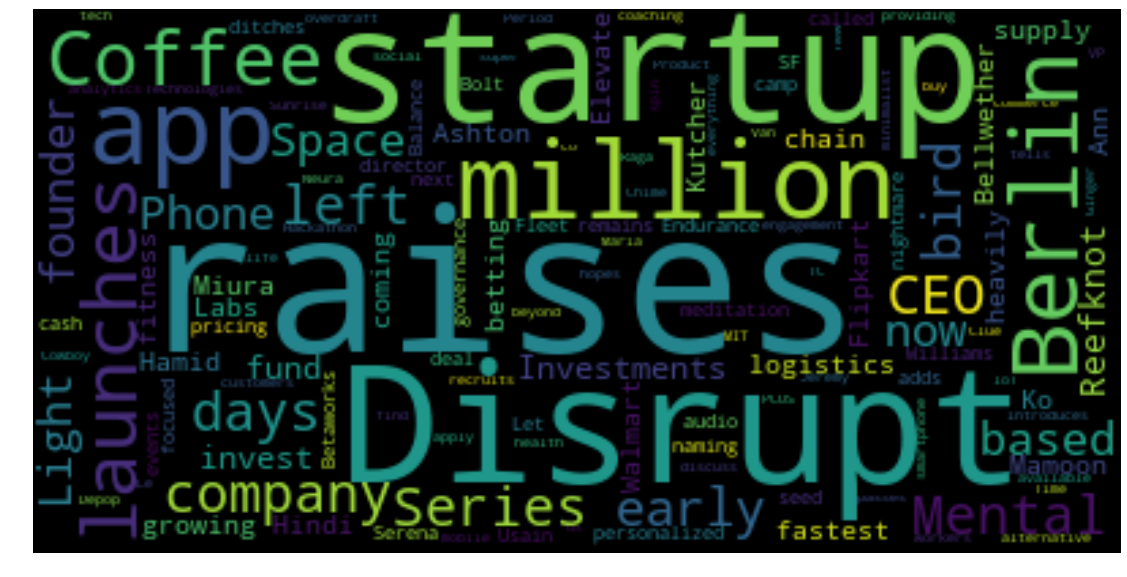

In [167]:
from matplotlib import *
#Use pyplot from matplotlib
matplotlib.pyplot.figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

<b>Topic Modelling